In [70]:
import matplotlib.pyplot as plt
import numpy as np
from rasterio import plot
import pandas as pd
import sys
import os
#import earthpy.plot as ep
import gdal
import shapefile
import csv
import time

import rasterstats as rs

import fiona, rasterio
import geopandas as gpd
import rasterio.plot as rplt
from rasterio.features import rasterize
from rasterstats import zonal_stats


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# import rasterio as rio
# from rasterio.plot import show
# from rasterio.mask import mask
# from shapely.geometry import mapping
# import geopandas as gpd
# import earthpy as et
# import earthpy.spatial as es

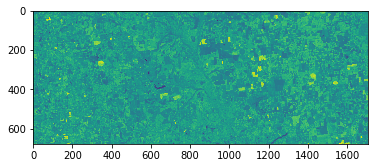

[-0.21042635 -0.20319676 -0.20148262 ...  0.53823687  0.53919694
  0.53970803]


In [3]:
data_folder_path = '/home/chris/Desktop/diploma/Diploma-Workspace/Data/'
labels_folder_path = '/home/chris/Desktop/diploma/Diploma-Workspace/Ground_Truth_Data/'
shapefiles_folder_path = data_folder_path + 'Shapefiles/'

tif_path = data_folder_path + 'NDVI_raster.tif'

ndvi_data_tif = gdal.Open(tif_path)
ndvi_data = np.array(ndvi_data_tif.GetRasterBand(1).ReadAsArray())
plot.show(ndvi_data)
print(np.unique(ndvi_data))

In [4]:
shapefiles_name_list = os.listdir(data_folder_path + 'Shapefiles/')
shapefiles_name_list = sorted([file for file in shapefiles_name_list if file.endswith('shp')])
print(shapefiles_name_list)

print(tif_path)

['Corn_shapefile_64.shp', 'Cotton_shapefile_64.shp', 'Peanuts_shapefile_64.shp']
/home/chris/Desktop/diploma/Diploma-Workspace/Data/NDVI_raster.tif


In [5]:
# shapefiles_list =[]
# for sf in shapefiles_name_list:
#     shapefiles_list.append(shapefile.Reader(shapefiles_folder_path + sf))
    
# print(shapefiles_list)

In [6]:
# shapes = shapefiles_list[2].shapes()
# print(len(shapes))
# print(['%.3f' % coord for coord in shapes[0].bbox])

# for name in dir(shapes[0]):
#     if not name.startswith('_'):
#         print(name)
        
# #shapeType: an integer representing the type of shape as defined by the shapefile specification
# #shapeTypeName: a string representation of the type of shape as defined by shapeType. Read-only.
# #bbox: If the shape type contains multiple points this tuple describes the lower left (x,y) coordinate and upper right corner coordinate creating a complete box around the points. If the shapeType is a Null (shapeType == 0) then an AttributeError is raised.
# #parts: Parts simply group collections of points into shapes. If the shape record has multiple parts this attribute contains the index of the first point of each part. If there is only one part then a list containing 0 is returned.
# #points: The points attribute contains a list of tuples containing an (x,y) coordinate for each point in the shape.

In [7]:
# # if you need to do more than just type or bounds checking,
# #you may want to convert the geometry to the more human-readable
# #GeoJSON format, where lines and polygons are grouped for you:
# s = shapefiles_list[2].shape(0)
# geoj = s.__geo_interface__
# geoj['type']

In [8]:
# fields = shapefiles_list[2].fields
# records = shapefiles_list[2].records()
# dct = records[0].as_dict()

In [9]:
# print(fields)
# print(type(records[0][0]))
# sorted(dct.items())
# print(records[0].oid)

In [10]:
def array_to_raster(array, old_raster_used_for_projection, save_path):

    width = old_raster_used_for_projection.RasterYSize
    height = old_raster_used_for_projection.RasterXSize
    gt = old_raster_used_for_projection.GetGeoTransform()
    wkt_projection = old_raster_used_for_projection.GetProjectionRef()

    
    if len(array.shape):
        array = np.expand_dims(array, axis=0)

    no_bands =  array.shape[0]

    
    driver = gdal.GetDriverByName('GTiff')
    DataSet = driver.Create(save_path, height, width, no_bands, gdal.GDT_Float64)
    DataSet.SetGeoTransform(gt)
    DataSet.SetProjection(wkt_projection)
    
    
    for i, image in enumerate(array, 1):
        DataSet.GetRasterBand(i).WriteArray(image)
    DataSet = None
    
    return save_path

(678, 1706)


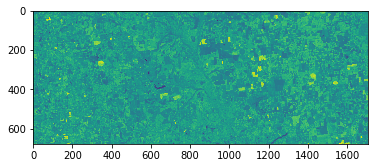

(678, 1706)


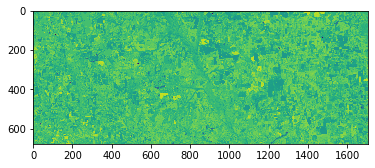

(678, 1706)


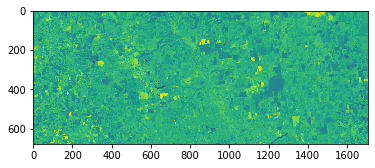

(678, 1706)


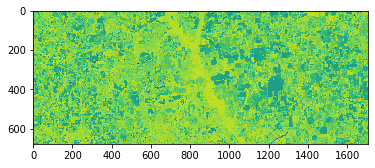

(678, 1706)


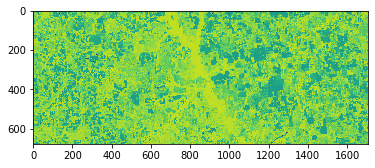

(678, 1706)


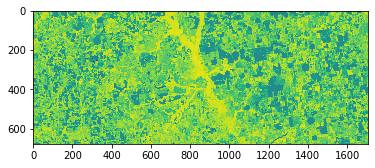

(678, 1706)


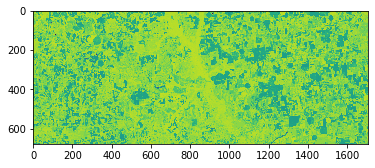

(678, 1706)


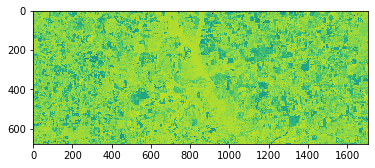

(678, 1706)


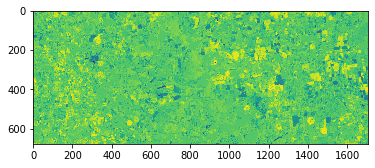

(678, 1706)


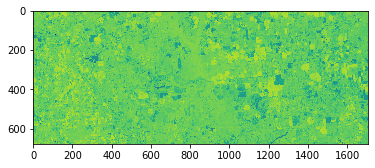

(678, 1706)


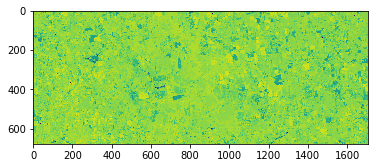

(678, 1706)


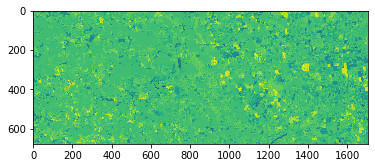

(678, 1706)


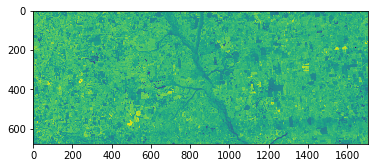

(678, 1706)


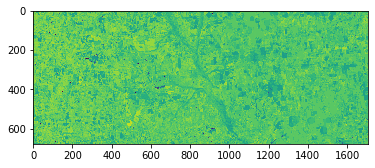

In [11]:
ndvi_data = gdal.Open(tif_path)
no_bands = ndvi_data.RasterCount
ndvi_data_array = []
ndvi_data_tif = []
for i in range(no_bands):
    ndvi_data_tif.append(ndvi_data.GetRasterBand(i+1))
    ndvi_data_array.append(ndvi_data.GetRasterBand(i+1).ReadAsArray())
    print(ndvi_data_array[i].shape)
    plot.show(ndvi_data_array[i])
    
    array_to_raster(ndvi_data_array[i],ndvi_data,data_folder_path + 'ndvi_date_' + str(i+1))
    
    

In [12]:
# #stats = rs.zonal_stats(output_file, tif_path, stats=rs.utils.VALID_STATS, nodata=-9999)
# summed_file_path = shapefiles_folder_path + 'summed_map_shapefile.shp'
# summed_stats = rs.zonal_stats(summed_file_path, tif_path,  stats="count min mean max median majority unique", nodata=-9999)

In [13]:
print(ndvi_data_tif)

[<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f4d79392840> >, <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f4d60b855a0> >, <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f4d60b85ae0> >, <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f4d60b85600> >, <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f4d60b854b0> >, <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f4d22064330> >, <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f4d22064900> >, <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f4d220645d0> >, <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f4d22064f00> >, <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f4d22064cc0> >, <osgeo.gdal.Band; proxy of <Swig Object of type '

In [14]:
# stats_dicts_for_each_crop_and_date = []
# for shape in shapefiles_name_list:
#     print(shape)
#     summed_file_path = shapefiles_folder_path + shape
#     print(summed_file_path)
#     stats_of_each_date = []
#     for i in range(len(ndvi_data_tif)):
#         print(i)
#         stats_of_each_date.append(rs.zonal_stats(summed_file_path, data_folder_path + 'ndvi_date_' + str(i+1), stats="count min mean max median majority unique", nodata=-9999))
#     stats_dicts_for_each_crop_and_date.append(stats_of_each_date)
    
    

In [15]:
# print(len(stats_dicts_for_each_crop_and_date[0]))

In [39]:
# csv_path = data_folder_path + 'CSVs/'
# crop_name = ['Cotton', 'Corn', 'Peanuts']
# for idx,crop in enumerate(crop_name):
#     for i in range(len(stats_dicts_for_each_crop_and_date[idx])):
#         toCSV = stats_dicts_for_each_crop_and_date[idx][i]
#         keys = toCSV[0].keys()
#         with open(csv_path + crop_name[idx] + '_date_' + str(i+1) + '_stats.csv', 'w') as output_file:
#             dict_writer = csv.DictWriter(output_file, keys)
#             dict_writer.writeheader()
#             dict_writer.writerows(toCSV)

In [74]:
crop_name = ['Cotton', 'Corn', 'Peanuts']
labels = [2,1,10]
crop_arrays = []
ndvi_means = []
ndvi_labels = []
j = 0
for crop in crop_name:
    date_array = []
    for i in range(no_bands):
        stats = pd.read_csv(data_folder_path + 'CSVs/'+ crop + '_date_' + str(i+1) +'_stats.csv')
        date_array.append(stats.to_numpy())
    crop_arrays.append(np.asarray(date_array))
    temp = np.asarray(date_array)[:,:,2] #mean
    print(temp.shape)
    ndvi_labels.append(np.ones(temp.shape[1])*labels[j])
    ndvi_means.append(temp)
    j = j + 1
    
    
    
    
print((ndvi_means[0].shape))
print(ndvi_means[2].shape[1])
        
    

(14, 49)
(14, 359)
(14, 248)
(14, 49)
248


In [86]:
train_x = []
test_x = []
train_y = []
test_y = []
for i in range(len(ndvi_means)):
    trans = np.transpose(ndvi_means[i])
    X_train, X_test, y_train, y_test = train_test_split(trans, ndvi_labels[i], test_size=0.20, random_state=42)
    train_x.append(X_train)
    test_x.append(X_test)
    train_y.append(y_train)
    test_y.append(y_test)
    
X_train = np.concatenate([train_x[0],train_x[1],train_x[2]])
X_test = np.concatenate([test_x[0],test_x[1],test_x[2]])
y_train = np.concatenate([train_y[0],train_y[1],train_y[2]])
y_test = np.concatenate([test_y[0],test_y[1],test_y[2]])

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(524, 14)
(132, 14)
(524,)
(132,)


In [65]:
y = np.concatenate([ndvi_labels[0],ndvi_labels[1],ndvi_labels[2]])
print(y.shape)
X = np.transpose(np.concatenate([ndvi_means[0],ndvi_means[1],ndvi_means[2]], axis=1))
print(X.shape)

(656,)
(656, 14)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(524, 14)
(524,)
(132, 14)
(132,)


In [71]:
clf = RandomForestClassifier(random_state=0)
start_train = time.time()
clf.fit(X_train, y_train)
end_train = time.time()
print(end_train - start_train)

start_test = time.time()
result = clf.score(X_test,y_test)
end_test = time.time()
print(end_test - start_test)

print(result)

0.1897575855255127
0.00824284553527832
0.9166666666666666


In [87]:
clf = RandomForestClassifier(random_state=0)
start_train = time.time()
clf.fit(X_train, y_train)
end_train = time.time()
print(end_train - start_train)

start_test = time.time()
result = clf.score(X_test,y_test)
end_test = time.time()
print(end_test - start_test)

print(result)

0.3285408020019531
0.012941122055053711
0.946969696969697


In [30]:
test = np.mean(crop_arrays[2],axis=0)[:,2]
print(test.shape)
print(test)

(248,)
[0.36097808 0.40790214 0.32408174 0.36988983 0.36290021 0.32666532
 0.3460554  0.4727914  0.42808777 0.34451453 0.33222317 0.49486236
 0.34766972 0.36488031 0.31375634 0.47504553 0.36234917 0.31287827
 0.3368571  0.31729192 0.40541367 0.33783741 0.27823698 0.39486302
 0.29849259 0.45405381 0.43988696 0.47753226 0.35039681 0.31757801
 0.3202396  0.438297   0.40412297 0.34003981 0.32269856 0.29235139
 0.31997757 0.30009192 0.39011492 0.3111527  0.3311959  0.31879121
 0.36357837 0.32207741 0.40134122 0.38697576 0.3344256  0.32864578
 0.31183305 0.32807455 0.33183046 0.26732043 0.33878788 0.32459504
 0.32115857 0.33718722 0.36969158 0.33605731 0.42394713 0.42813736
 0.34247632 0.36586555 0.34407973 0.39851996 0.280994   0.45474848
 0.33647813 0.33444568 0.33990125 0.34190661 0.32554579 0.3999007
 0.29582729 0.31923148 0.34506772 0.33067463 0.34821517 0.23607179
 0.31606573 0.35534609 0.42824965 0.45617268 0.2676208  0.28522336
 0.38132329 0.33829735 0.31665329 0.32082674 0.35148268 

In [24]:
corn_stats = stats.loc[stats['median']==1]
cotton_stats = stats.loc[stats['median']==2]
peanuts_stats = stats.loc[stats['median']==10]

In [28]:
corn_mean = corn_stats['mean'].mean()
cotton_mean = cotton_stats['mean'].mean()
peanuts_mean = peanuts_stats['mean'].mean()
print(corn_mean,cotton_mean,peanuts_mean)

4.533898305084746 4.45021645021645 4.690839694656488
